In [50]:
%matplotlib inline

In [51]:
import fenics
from fenics import dot, grad, dx
from functools import partial

## Create functional spaces

In [52]:
mesh = fenics.UnitSquareMesh(nx=8, ny=8)

V = fenics.FunctionSpace(mesh, "P", 1)

In [53]:
alpha = 3.0
beta = 1.2
u_D = fenics.Expression(
    "1 + x[0] * x[0] + alpha * x[1] * x[1] + beta * t",
    degree=2,
    alpha=alpha,
    beta=beta,
    t=0,
)


def boundary(x, on_boundary):
    return on_boundary


bc = fenics.DirichletBC(V, u_D, boundary)

In [54]:
u = fenics.TrialFunction(V=V)
v = fenics.TestFunction(V=V)
f = fenics.Constant(beta - 2.0 - 2.0 * alpha)

In [55]:
u_n = fenics.interpolate(u_D, V)
# u_n = fenics.project(u_D, V)

### Define problem

We let FEniCS determine what goes in the LHS and RHS automatically.

In [56]:
T = 2.0
num_steps = 10
dt = T / num_steps

In [57]:
F = u * v * dx + dt * dot(grad(u), grad(v)) * dx - (u_n + dt * f) * v * dx

a, L = fenics.lhs(F), fenics.rhs(F)

### Solve problem

In [58]:
u = fenics.Function(V)

t = 0
for n in range(num_steps):
    
    t += dt
    u_D.t = t
    
    fenics.solve(a == L, u, bcs=bc)
    
    u_n.assign(u)

In [60]:
type(u)

dolfin.function.function.Function

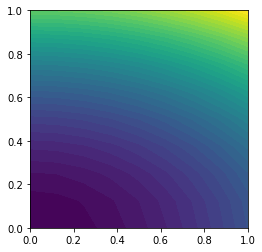

In [43]:
fenics.plot(u)

## Certify solution

In [44]:
compute_error = partial(fenics.errornorm, u=u_D, uh=u, mesh=mesh)

error_L2 = compute_error(norm_type="L2")
error_H1 = compute_error(norm_type="H1")

In [45]:
u_D_vertex = u_D.compute_vertex_values(mesh=mesh)
u_vertex = u.compute_vertex_values(mesh=mesh)

In [46]:
error_max = max(abs(u_D_vertex - u_vertex))

In [47]:
print("Errors", f"L2 = {error_L2}", f"H1 = {error_H1}", f"L8 = {error_max}", sep="\n")

Errors
L2 = 0.011048555903890245
H1 = 0.2284850190294798
L8 = 3.3436180935098037e-08


In [48]:
u.vector().get_local()

array([6.4       , 5.696875  , 6.415625  , 5.0875    , 5.7125    ,
       6.4625    , 4.571875  , 5.10312501, 5.75937501, 6.540625  ,
       4.15      , 4.58750001, 5.15000002, 5.83750001, 6.65      ,
       3.821875  , 4.16562501, 4.63437502, 5.22812502, 5.94687501,
       6.790625  , 3.5875    , 3.83750001, 4.21250002, 4.71250003,
       5.33750002, 6.08750001, 6.9625    , 3.446875  , 3.60312501,
       3.88437502, 4.29062503, 4.82187503, 5.47812502, 6.25937501,
       7.165625  , 3.4       , 3.46250001, 3.65000002, 3.96250003,
       4.40000003, 4.96250003, 5.65000002, 6.46250001, 7.4       ,
       3.415625  , 3.50937501, 3.72812502, 4.07187503, 4.54062503,
       5.13437502, 5.85312501, 6.696875  , 3.4625    , 3.58750001,
       3.83750002, 4.21250003, 4.71250002, 5.33750001, 6.0875    ,
       3.540625  , 3.69687501, 3.97812502, 4.38437502, 4.91562501,
       5.571875  , 3.65      , 3.83750001, 4.15000002, 4.58750001,
       5.15      , 3.790625  , 4.00937501, 4.35312501, 4.82187